Creating a jupyter notebook file to run the data processing/feature engineering commands

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [3]:
product_catalog_df = pd.read_csv("C:\\data\\Work\\data\\product_catalog_new.csv")

In [4]:
product_catalog_df

,Product ID,Product Name,Category,Material,Size,Special_features,Customer Type,Price,Payment Type,Sellable Online,Sales Volume,Return Rate,Storage Cost,Seasonality Score,Implicit Feedback
0,1,Ottoman Storage Bench,Storage & Organization,Fabric,Large,Durable,Normal,3895.12,Cash on Delivery,Yes,786,16.17,192.22,8,Neutral
1,2,Chaise Sofas,Sofas & Seating,Fabric,Medium,Ergonomic,Normal,2648.62,Cash on Delivery,No,233,3.34,11.09,2,Negative
2,3,2 Seater sofa,Sofas & Seating,Leather,Medium,Minimalist,Member,122.63,Cash on Delivery,No,635,13.02,149.57,2,Neutral
3,4,Ottoman Storage Bench,Storage & Organization,Fabric,Small,Ergonomic,Normal,730.69,Credit Card,Yes,935,10.02,135.43,4,Positive
4,5,Padded Dining Chair,Kitchen & Dining,Fabric,Small,Foldable,Normal,1478.47,Cash on Delivery,No,527,11.71,116.37,5,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Expandable Kitchen Island,Kitchen & Dining,Wood,Large,Durable,Member,1547.88,Credit Card,Yes,148,0.96,95.56,2,Neutral
96,97,Industrial Console Table,Tables,Metal,Small,Minimalist,Member,2112.54,Credit Card,Yes,891,14.69,105.31,3,Neutral
97,98,King Size Bed Frame,Bedroom Furniture,Wood,Small,Minimalist,Normal,574.40,Cash on Delivery,Yes,74,17.37,21.50,2,Negative
98,99,Large Wooden Dresser,Bedroom Furniture,Wood,Large,Foldable,Normal,1205.65,Credit Card,No,560,5.25,85.11,1,Neutral


In [5]:
product_catalog_df.head()

,Product ID,Product Name,Category,Material,Size,Special_features,Customer Type,Price,Payment Type,Sellable Online,Sales Volume,Return Rate,Storage Cost,Seasonality Score,Implicit Feedback
0,1,Ottoman Storage Bench,Storage & Organization,Fabric,Large,Durable,Normal,3895.12,Cash on Delivery,Yes,786,16.17,192.22,8,Neutral
1,2,Chaise Sofas,Sofas & Seating,Fabric,Medium,Ergonomic,Normal,2648.62,Cash on Delivery,No,233,3.34,11.09,2,Negative
2,3,2 Seater sofa,Sofas & Seating,Leather,Medium,Minimalist,Member,122.63,Cash on Delivery,No,635,13.02,149.57,2,Neutral
3,4,Ottoman Storage Bench,Storage & Organization,Fabric,Small,Ergonomic,Normal,730.69,Credit Card,Yes,935,10.02,135.43,4,Positive
4,5,Padded Dining Chair,Kitchen & Dining,Fabric,Small,Foldable,Normal,1478.47,Cash on Delivery,No,527,11.71,116.37,5,Neutral


In [6]:
product_catalog_df.describe

<bound method NDFrame.describe of     Product ID               Product Name                Category Material  \
0            1      Ottoman Storage Bench  Storage & Organization   Fabric   
1            2               Chaise Sofas         Sofas & Seating   Fabric   
2            3              2 Seater sofa         Sofas & Seating  Leather   
3            4      Ottoman Storage Bench  Storage & Organization   Fabric   
4            5        Padded Dining Chair        Kitchen & Dining   Fabric   
..         ...                        ...                     ...      ...   
95          96  Expandable Kitchen Island        Kitchen & Dining     Wood   
96          97   Industrial Console Table                  Tables    Metal   
97          98        King Size Bed Frame       Bedroom Furniture     Wood   
98          99       Large Wooden Dresser       Bedroom Furniture     Wood   
99         100          Modern TV Cabinet  Storage & Organization     Wood   

      Size Special_features C

In [7]:
column_list=(list(product_catalog_df.columns))
print(column_list)

['Product ID', 'Product Name', 'Category', 'Material', 'Size', 'Special_features', 'Customer Type', 'Price', 'Payment Type', 'Sellable Online', 'Sales Volume', 'Return Rate', 'Storage Cost', 'Seasonality Score', 'Implicit Feedback']


In [8]:
#Observing the different types of data

print("=============================================")
print("Data types of the columns in the data frame:", product_catalog_df.dtypes)
print("=============================================")
print("Shape of the data frame:", product_catalog_df.shape)
print("=============================================")
print("Information about the data frame:", product_catalog_df.info())
product_catalog_df.head()

Data types of the columns in the data frame: Product ID             int64
Product Name          object
Category              object
Material              object
Size                  object
Special_features      object
Customer Type         object
Price                float64
Payment Type          object
Sellable Online       object
Sales Volume           int64
Return Rate          float64
Storage Cost         float64
Seasonality Score      int64
Implicit Feedback     object
dtype: object
Shape of the data frame: (100, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product ID         100 non-null    int64  
 1   Product Name       100 non-null    object 
 2   Category           100 non-null    object 
 3   Material           100 non-null    object 
 4   Size               100 non-null    object 
 5   Special_features   100 non

,Product ID,Product Name,Category,Material,Size,Special_features,Customer Type,Price,Payment Type,Sellable Online,Sales Volume,Return Rate,Storage Cost,Seasonality Score,Implicit Feedback
0,1,Ottoman Storage Bench,Storage & Organization,Fabric,Large,Durable,Normal,3895.12,Cash on Delivery,Yes,786,16.17,192.22,8,Neutral
1,2,Chaise Sofas,Sofas & Seating,Fabric,Medium,Ergonomic,Normal,2648.62,Cash on Delivery,No,233,3.34,11.09,2,Negative
2,3,2 Seater sofa,Sofas & Seating,Leather,Medium,Minimalist,Member,122.63,Cash on Delivery,No,635,13.02,149.57,2,Neutral
3,4,Ottoman Storage Bench,Storage & Organization,Fabric,Small,Ergonomic,Normal,730.69,Credit Card,Yes,935,10.02,135.43,4,Positive
4,5,Padded Dining Chair,Kitchen & Dining,Fabric,Small,Foldable,Normal,1478.47,Cash on Delivery,No,527,11.71,116.37,5,Neutral


In [9]:
#Checking missing values
print(product_catalog_df.isnull().sum())

Product ID           0
Product Name         0
Category             0
Material             0
Size                 0
Special_features     0
Customer Type        0
Price                0
Payment Type         0
Sellable Online      0
Sales Volume         0
Return Rate          0
Storage Cost         0
Seasonality Score    0
Implicit Feedback    0
dtype: int64


In [10]:
print("Product Catalog Duplicates:", product_catalog_df.duplicated().sum())

Product Catalog Duplicates: 0



--- Checking Outliers (Boxplot) ---


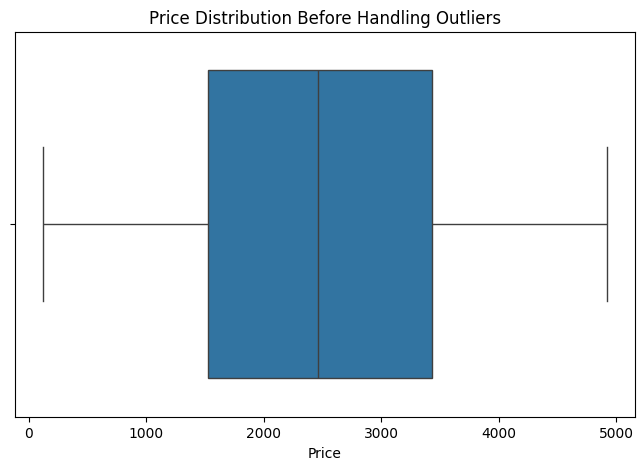

In [11]:
print("\n--- Checking Outliers (Boxplot) ---")
plt.figure(figsize=(8,5))
sns.boxplot(x=product_catalog_df["Price"])
plt.title("Price Distribution Before Handling Outliers")
plt.show()

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_23272\1574029216.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=product_catalog_df["Category"], y=product_catalog_df["Sales Volume"], ci=None)


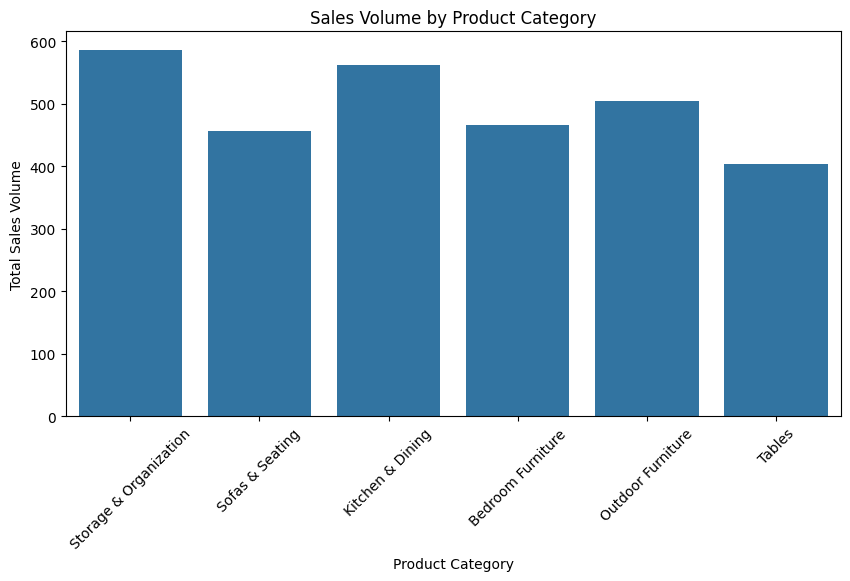

In [12]:
#Bar plot for products vs sales
plt.figure(figsize=(10,5))
sns.barplot(x=product_catalog_df["Category"], y=product_catalog_df["Sales Volume"], ci=None)
plt.xticks(rotation=45)
plt.title("Sales Volume by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Volume")
plt.show()


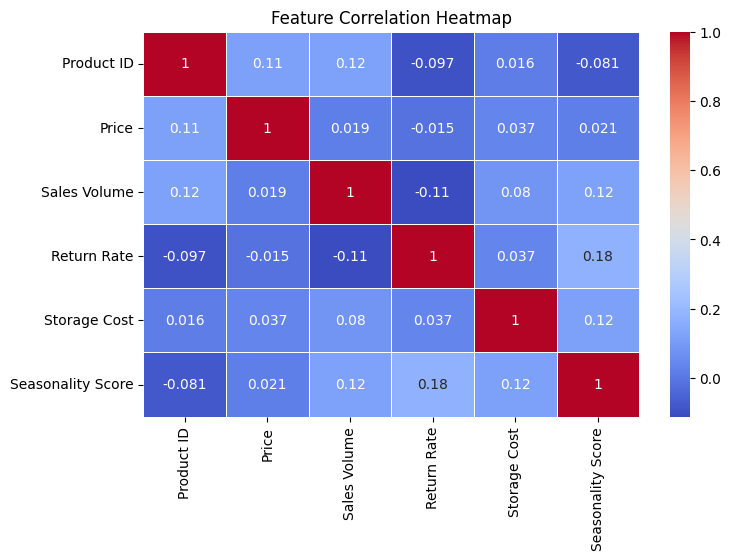

In [14]:
# Select only numerical columns for correlation
numeric_data = product_catalog_df.select_dtypes(include=["number"])

# Generate heatmap
plt.figure(figsize=(8,5))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



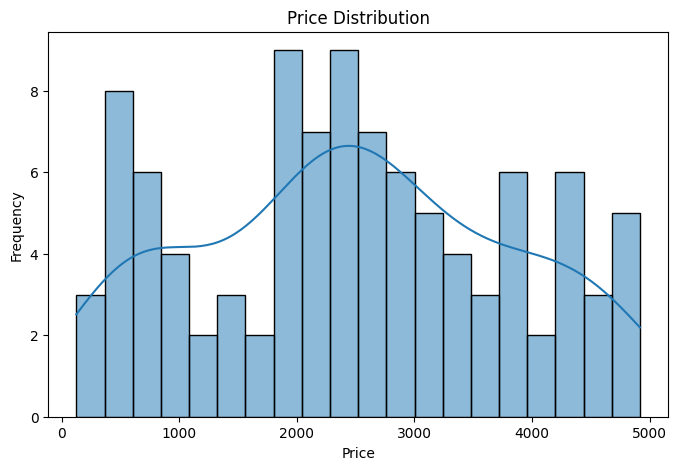

In [15]:
#return rate
plt.figure(figsize=(8,5))
sns.histplot(product_catalog_df["Price"], bins=20, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


Text(0, 0.5, '')

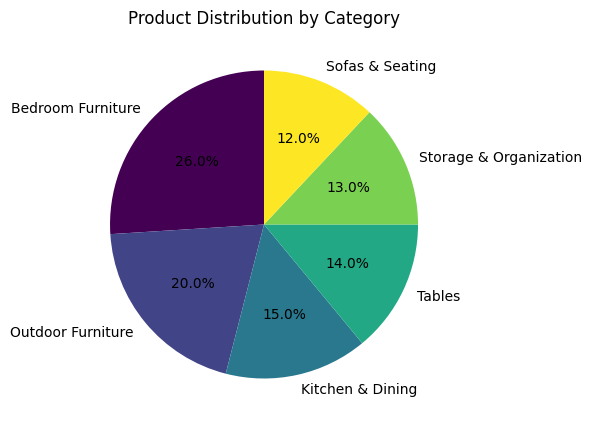

In [17]:
#product distribution
plt.figure(figsize=(8,5))
product_catalog_df["Category"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="viridis")
plt.title("Product Distribution by Category")
plt.ylabel("") 


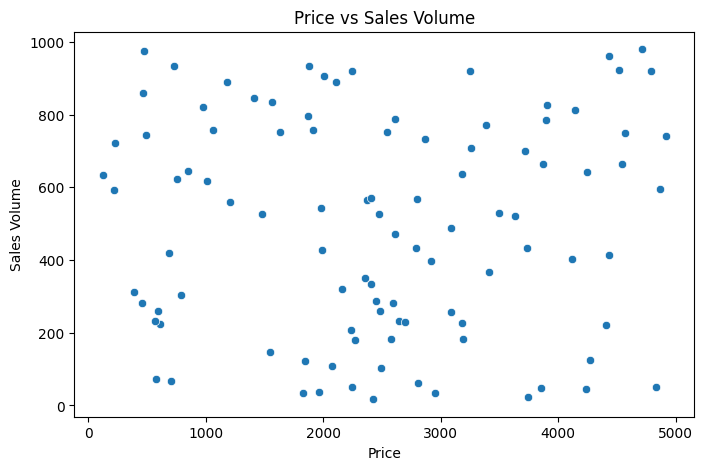

In [ ]:
#scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=product_catalog_df["Price"], y=product_catalog_df["Sales Volume"])
plt.title("Price vs Sales Volume")
plt.xlabel("Price")
plt.ylabel("Sales Volume")
plt.show()


In [19]:
print((product_catalog_df == "").sum())



Product ID           0
Product Name         0
Category             0
Material             0
Size                 0
Special_features     0
Customer Type        0
Price                0
Payment Type         0
Sellable Online      0
Sales Volume         0
Return Rate          0
Storage Cost         0
Seasonality Score    0
Implicit Feedback    0
dtype: int64


In [ ]:
#Standardizing categorical data
categorical_cols = ["Sellable Online", "Payment Type"]
for col in categorical_cols:
    if col in product_catalog_df.columns:
        product_catalog_df[col] = product_catalog_df[col].str.lower().str.strip()


In [23]:
scaler = StandardScaler()
scaled_cols = ["Price", "Sales Volume", "Return Rate", "Storage Cost", "Seasonality Score"]
product_catalog_df[scaled_cols] = scaler.fit_transform(product_catalog_df[scaled_cols])

In [ ]:
#converting data types
convert_types = {
    "Price": float,
    "Sales Volume": int,
    "Return Rate": float,
    "Storage Cost": float
}
for col, dtype in convert_types.items():
    if col in product_catalog_df.columns:
        product_catalog_df[col] = product_catalog_df[col].astype(dtype)